# Ajuste de un modelo lineal

Este ejemplo muestra el proceso de ajuste de un modelo lineal con un perceptrón simple y como función de activación la función lineal.

El perceptrón recibe $x$ y el sesgo $b$ como entrada y se utiliza una tasa de aprendizaje de $0,05$. Los datos corresponden a la función lineal $f(x)=2x-10$. Queremos conseguir mediante el método del descenso del gradiente los dos parámetros $w1$ y $b1$.

Vamos a utilizar `numpy` y `pandas` para dibujar los gráficos.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

Los datos de entrada corresponden a la función lineal descrita y se utilizan 13 datos para entrenar el modelo.

In [2]:
# Datos de entrada
xList = [ -5,  -4,  -3,  -2,  -1,   0,  1,  2,  3,  4, 5, 6, 7]

# Datos de salida (la función es 2*x - 10)
yList = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4]

alpha = 0.05

Ahora vamos a definir las funciones del modelo. 

- `linear` es la función de activación.
- `forward` es la fase de estimación que le aplica la función de activación a la entrada multiplicada por el parámetro y suma el sesgo.
- `backward` es la fase de ajuste del parámetro mediante el descenso del gradiente, que utiliza la tasa de aprendizaje `alpha` y el gradiente. El gradiente es la derivada de la función de error con respecto al parámetro, que en nuestro caso es la función de error cuadrático.
- `error` es la función que calcula el error cuadratico entre el valor estimado y el valor observado en los datos.

In [3]:
def linear(x):
    return x

In [4]:
def forward(x, w, b):
    yEst = linear(w*x + b)
    return yEst

In [5]:
def backward(w, dE_w):
    return w - (alpha*dE_w)

In [6]:
def error(yEst, y):
    return np.power(yEst-y, 2)

Ahora vamos a establecer los valores de las variables. En particular la condición de parada para el proceso de ajuste iterativo que es $10^{-20}$. Los valores iniciales de los parámetros son arbitrarios. Definimos la lista donde se almacenarán los valores durante el ajuste para graficar su evolución. Se define la variable que indica el número máximo de iteraciones que en este caso es `1000` y una variable de ayuda para almacenar el tamaño de los datos para recorrerlos en un ciclo.

In [22]:
stopAt = 1e-20

w1 = 0.46
b1 = 0.27

w1List = [w1]
b1List = [b1]
errList = []
dE_w1_List = []
dE_b1_List = []

numIter = 50

sizeOfData = np.size(xList)

Este es el ciclo principal que se ejecuta a lo sumo `numIter` veces. Se define una variable `index` para saber cual valor de los datos tomar y cual valor observado tomar para evaluar el error. Se realizan varias operación es de impresión para dar una idea de cómo va la ejecución del programa y el avance dentro del ciclo.

El proceso consiste en el ciclo siguiente:

- Realizar el paso de estimación denominado `forward`.
- Calcular el error cuadrático entre el valor estimado en la fase previa y el valor observado mediante la función `error`.
- Calcular los gradientes que consiste en calcular la derivada de la función de error con respecto a `w1` y con respecto a `b1`.
- Aplicar el paso de ajuste `backward`.
- Almacenar los valores obtenidos para graficar los resultados.

In [23]:
echo=False
for i in range(numIter):
    
    index = i%sizeOfData
    x = xList[index]
    y = yList[index]
    
    if echo:
        # Imprimir valores
        print('Iteración '+str(i+1)+str(' de ')+str(numIter))
        print('Datos: x'+str(index)+':'+str(x)+', w1:'+str(w1)+', b1:'+str(b1))
    
    # Cálculo de y Estimado
    yEst = forward(x, w1, b1)
    if echo:
        print('y:'+str(y)+', yEst:'+str(yEst))
    
    # Cálculo del Error
    sse = error(yEst, y)
    if echo:
        print('error '+str(sse))
    
    # Cálculo de las derivadas parciales
    dE_w1 = 2*(yEst-y)*x
    dE_b1 = 2*(yEst-y)
    if echo:
        print('d3_w1:'+str(dE_w1)+', dE_b1:'+str(dE_b1))
    
    # Ajustando los parámetros w1 y b1
    w1 = backward(w1, dE_w1)
    b1 = backward(b1, dE_b1)
    if echo:
        print('After adjusting')
        print('w1:'+str(w1)+', b1:'+str(b1))
        print('')
    
    # Guardar valores
    errList.append(sse)
    w1List.append(w1)
    b1List.append(b1)
    dE_w1_List.append(dE_w1)
    dE_b1_List.append(dE_b1)
    
    # Chequear condición de parada
    if (sse<stopAt):
        break

Para chequer el resultado se dibuja cómo evoluciona el error durante el proceso de estimación y ajuste.

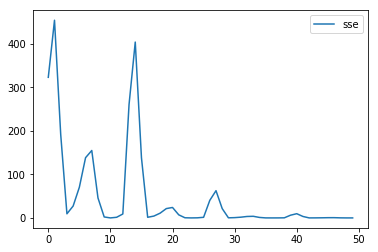

In [24]:
pd.DataFrame(errList, columns=['sse']).plot()

Se dibuja cómo evoluciona el parámetro `w1`. Se puede ver que alrededor de la iteración 50 ya converge el proceso de aprendizaje.

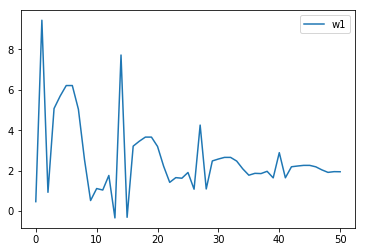

In [25]:
pd.DataFrame(w1List, columns=['w1']).plot()

Se dibuja el gráfico de cómo evoluciona el ajuste del sesgo.

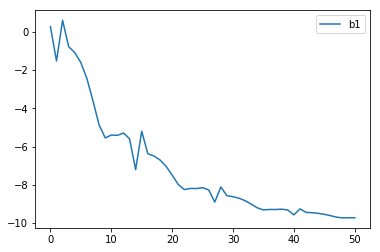

In [26]:
pd.DataFrame(b1List, columns=['b1']).plot()

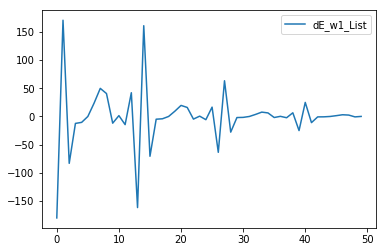

In [27]:
pd.DataFrame(dE_w1_List, columns=['dE_w1_List']).plot()

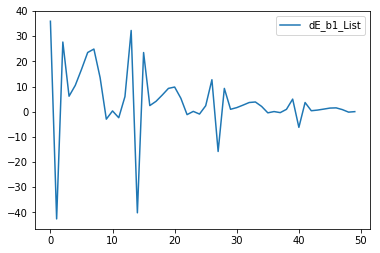

In [28]:
pd.DataFrame(dE_b1_List, columns=['dE_b1_List']).plot()

In [21]:
print(w1, b1)

(1.9978303527863466, -9.993491058359039)


Recordemos que los datos provienen de la función $f(x)=2x-10$ y los valores que se aprenden están cerca con un error de $10^{-20}$.

A continuación el código sin imprimir ni almacenar datos.

In [21]:
stopCond = 1e-20

w1 = 0.46
b1 = 0.27

numIter = 1000

sizeOfData = np.size(xList)

for i in range(numIter):
    # Variables
    index = i%sizeOfData
    x = xList[index]
    y = yList[index]
    
    # Cálculo de y Estimado 
    yEst = forward(x, w1, b1)

    # Cálculo del error
    sse = error(yEst, y)

    # Cálculo de las derivadas parciales del Error con 
    # respecto a los parámetros
    dE_w1 = 2*(yEst-y)*x
    dE_b1 = 2*(yEst-y)
    
    # Ajustando los parámetros w1 y b1
    w1 = backward(w1, dE_w1)
    b1 = backward(b1, dE_b1)
    
    # Chequear condición de parada
    if (sse<stopCond):
        break

In [22]:
print(w1, b1)

(1.9999999995335829, -9.999999997782723)
